## No PCA, No Cross channel features

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
os.chdir("..") 
from scripts.train_and_test import load_and_preprocess_data, train_sklearn_classifiers, train_pytorch_classifiers, print_results
data_path = r"C:\Users\chloe\OneDrive\Desktop\materials classification\features_dataset.csv"

X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes, label_encoder = load_and_preprocess_data(data_path)

sklearn_results = train_sklearn_classifiers(X_train_scaled, X_test_scaled, y_train, y_test)

pytorch_results = train_pytorch_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes)


Data shape: (7250, 30)
Num classes: 7
Classes: ['Al' 'Cu' 'FEP' 'PE' 'PET' 'PI' 'Paper']
Num samples per class:
Al: 1037
Cu: 981
FEP: 1132
PE: 988
PET: 1004
PI: 1114
Paper: 994

Train set: 5800 samples
Test set: 1450 samples

SVM Accuracy: 0.6557 (+/- 0.0113)
KNN Accuracy: 0.9193 (+/- 0.0075)
Random Forest Accuracy: 0.9644 (+/- 0.0069)
Decision Tree Accuracy: 0.8720 (+/- 0.0084)
Simple NN (64) Accuracy: 0.9172
Medium NN (128-64) Accuracy: 0.9517
Deep NN (256-128-64) Accuracy: 0.8214


In [2]:
all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)


Model Accuracies:
  Random Forest                 : 0.9644
  Medium NN (128-64)            : 0.9517
  KNN                           : 0.9193
  Simple NN (64)                : 0.9172
  Decision Tree                 : 0.8720
  Deep NN (256-128-64)          : 0.8214
  SVM                           : 0.6557


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cms(results, label_encoder):
    class_names = label_encoder.classes_

    for name, metrics in results.items():
        cm = metrics.get("confusion_matrix")
        if cm is None:
            continue
        # Convert confusion matrix to proportions
        cm_prop = cm.astype(np.float64)
        row_sums = cm_prop.sum(axis=1, keepdims=True)
        # Avoid division by zero
        cm_prop = np.divide(cm_prop, row_sums, where=row_sums != 0)

        plt.figure(figsize=(5, 4))
        sns.heatmap(cm_prop, annot=True, fmt=".2f", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names, vmin=0, vmax=1)
        acc = metrics.get("accuracy", None)
        plt.title(f"{name} - {acc:.4f}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()
        plt.show()

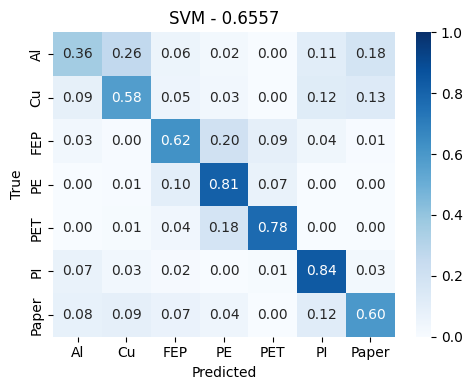

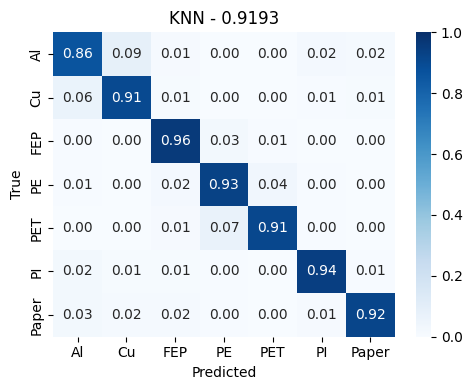

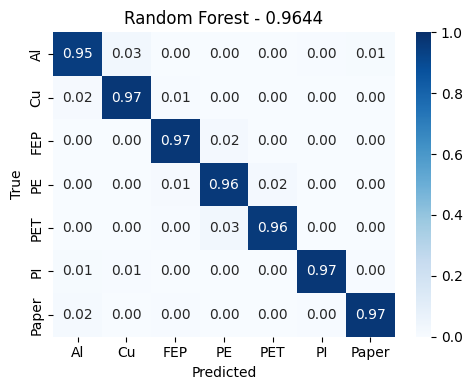

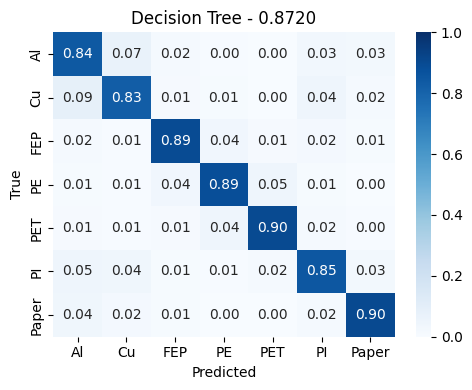

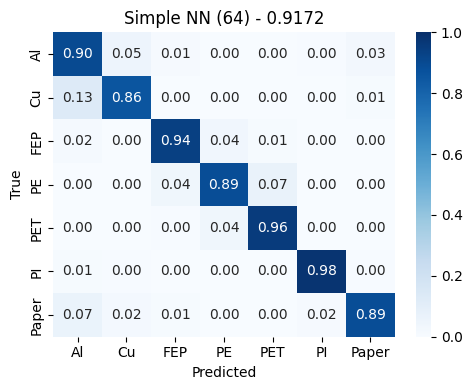

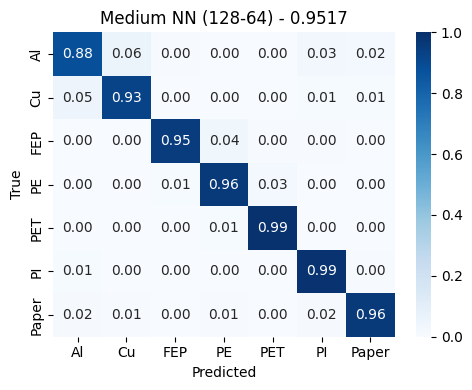

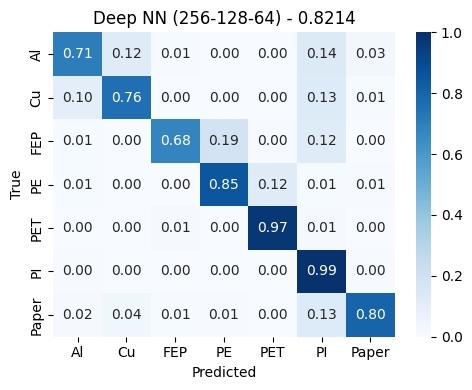

In [4]:
plot_cms(all_results, label_encoder)

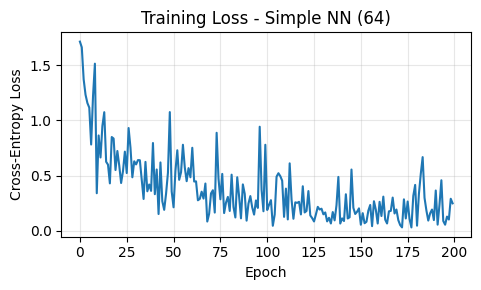

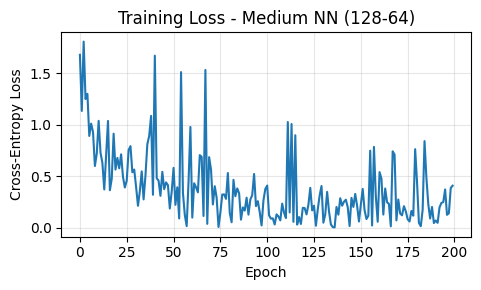

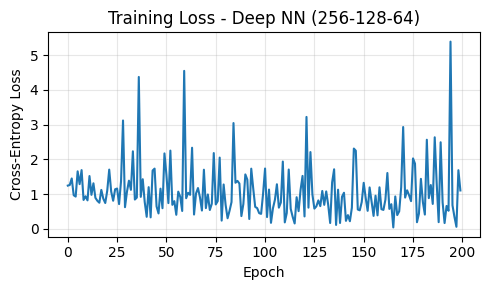

In [5]:
def plot_losses(results):
    for name, metrics in results.items():
        loss_hist = metrics.get("loss_history")
        if not loss_hist:
            continue

        plt.figure(figsize=(5, 3))
        plt.plot(loss_hist)
        plt.title(f"Training Loss - {name}")
        plt.xlabel("Epoch")
        plt.ylabel("Cross-Entropy Loss")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

plot_losses(pytorch_results)

## With PCA, No Cross Channel Features

In [6]:
sklearn_results = train_sklearn_classifiers(
    X_train_scaled,
    X_test_scaled,
    y_train,
    y_test,
    pca=True, 
    n_components=0.95)

pytorch_results = train_pytorch_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    n_features, 
    n_classes, 
    pca=True, 
    n_components=0.95)

all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)

PCA applied: 11 components, 0.9518 variance explained
SVM Accuracy: 0.6006 (+/- 0.0102)
KNN Accuracy: 0.9006 (+/- 0.0090)
Random Forest Accuracy: 0.9348 (+/- 0.0109)
Decision Tree Accuracy: 0.8674 (+/- 0.0074)
PCA applied: 11 components, 0.9513 variance explained
Simple NN (64) Accuracy: 0.8524
Medium NN (128-64) Accuracy: 0.9255
Deep NN (256-128-64) Accuracy: 0.5310

Model Accuracies:
  Random Forest                 : 0.9348
  Medium NN (128-64)            : 0.9255
  KNN                           : 0.9006
  Decision Tree                 : 0.8674
  Simple NN (64)                : 0.8524
  SVM                           : 0.6006
  Deep NN (256-128-64)          : 0.5310


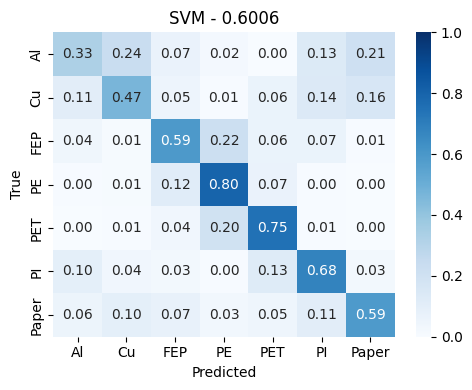

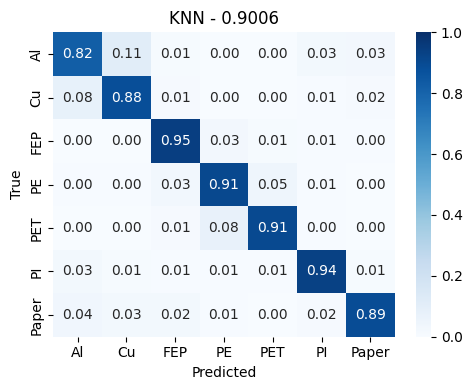

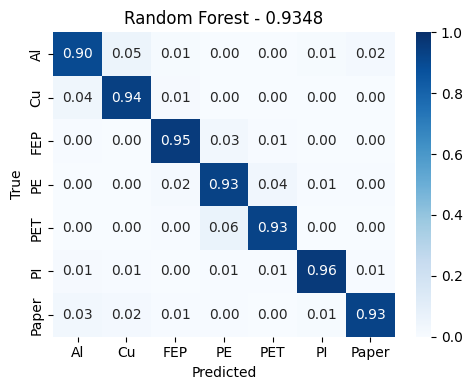

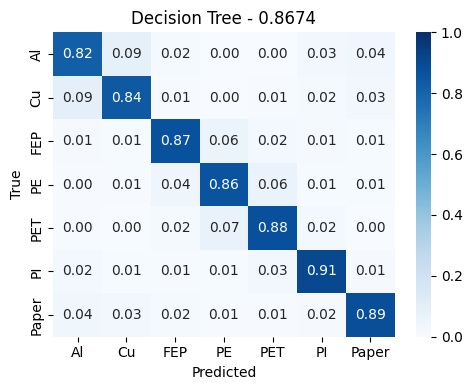

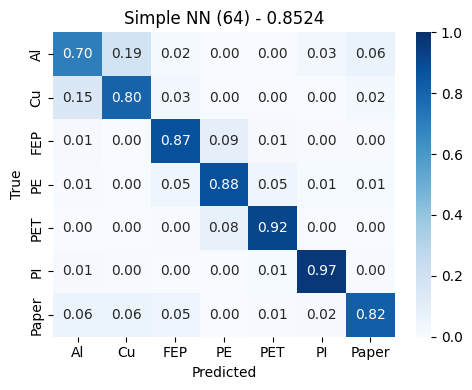

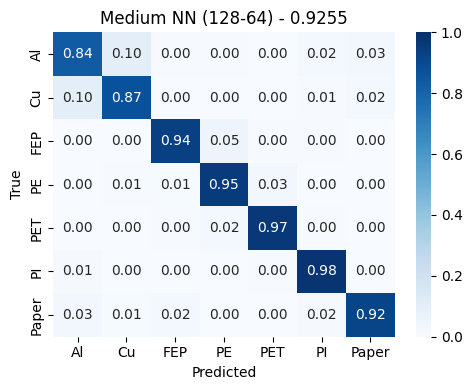

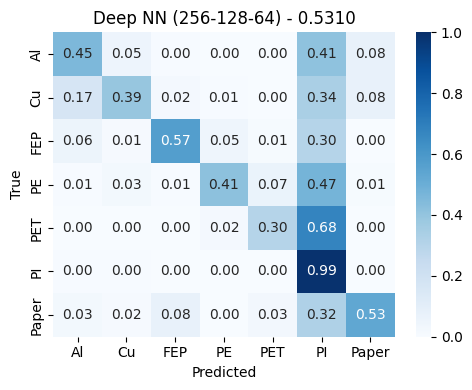

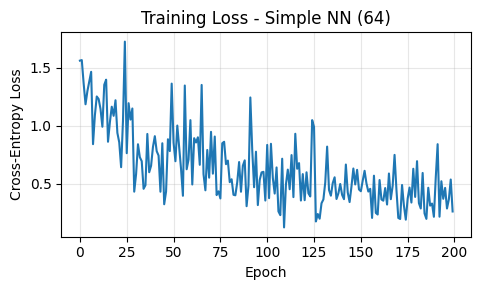

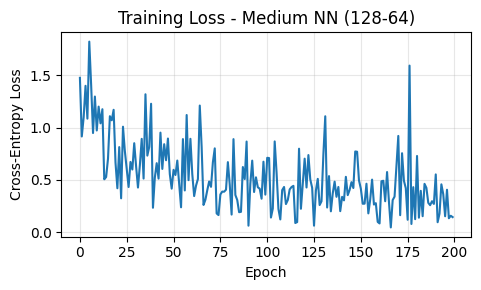

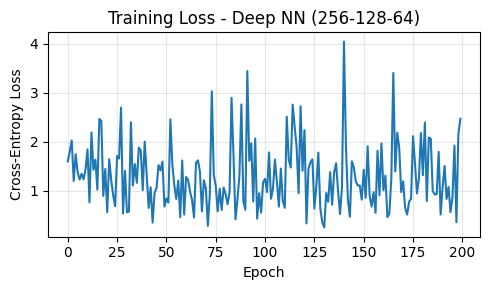

In [7]:
plot_cms(all_results, label_encoder)
plot_losses(pytorch_results)

## No PCA, With Cross Channel Features

In [8]:
data_path = r"C:\Users\chloe\OneDrive\Desktop\materials classification\features_dataset_plus.csv"

X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes, label_encoder = load_and_preprocess_data(data_path)

sklearn_results = train_sklearn_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test)

pytorch_results = train_pytorch_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    n_features, 
    n_classes)

all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)

Data shape: (7020, 85)
Num classes: 7
Classes: ['Al' 'Cu' 'FEP' 'PE' 'PET' 'PI' 'Paper']
Num samples per class:
Al: 1007
Cu: 951
FEP: 1102
PE: 958
PET: 974
PI: 1063
Paper: 965

Train set: 5616 samples
Test set: 1404 samples

SVM Accuracy: 0.7802 (+/- 0.0097)
KNN Accuracy: 0.9177 (+/- 0.0084)
Random Forest Accuracy: 0.9880 (+/- 0.0039)
Decision Tree Accuracy: 0.9410 (+/- 0.0096)
Simple NN (64) Accuracy: 0.9623
Medium NN (128-64) Accuracy: 0.9672
Deep NN (256-128-64) Accuracy: 0.9566

Model Accuracies:
  Random Forest                 : 0.9880
  Medium NN (128-64)            : 0.9672
  Simple NN (64)                : 0.9623
  Deep NN (256-128-64)          : 0.9566
  Decision Tree                 : 0.9410
  KNN                           : 0.9177
  SVM                           : 0.7802


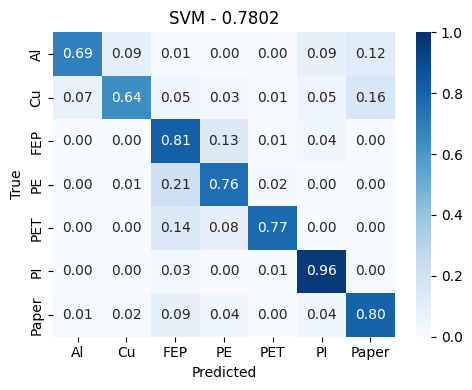

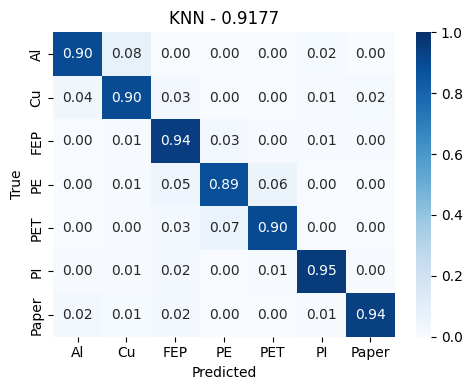

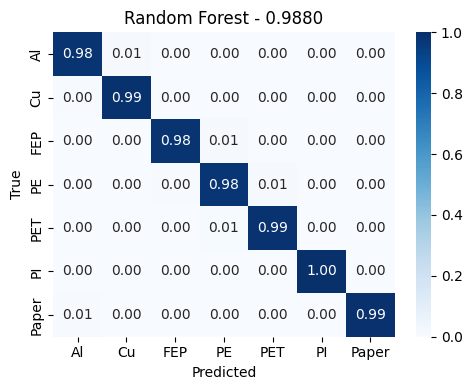

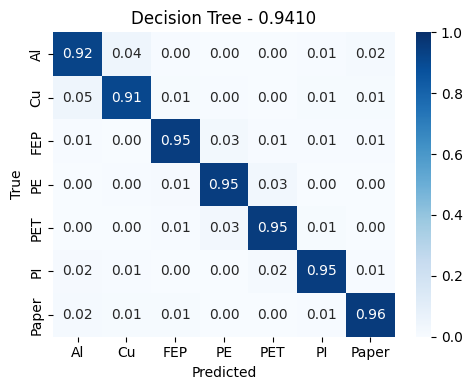

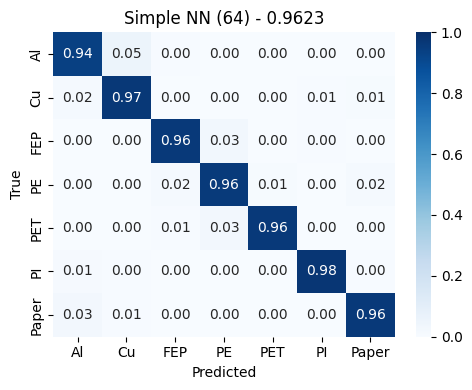

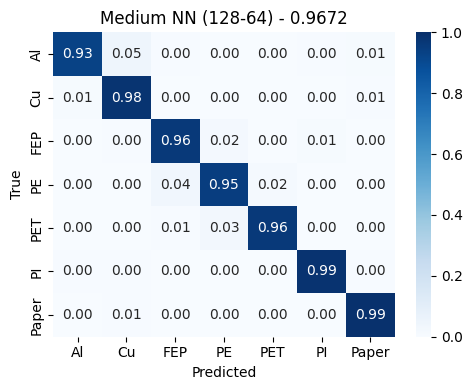

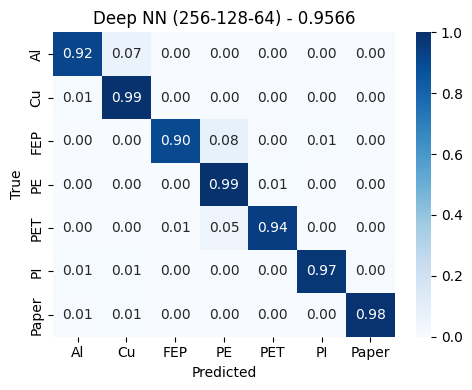

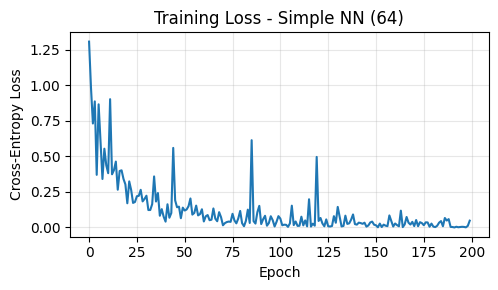

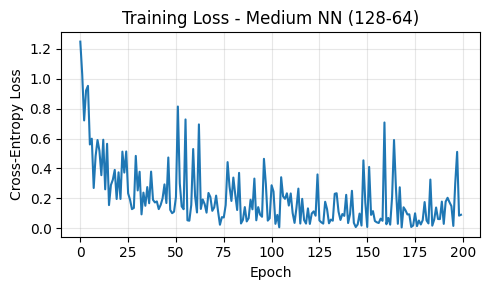

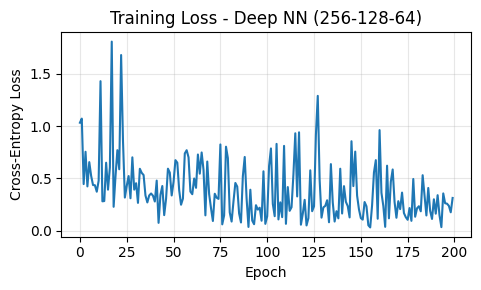

In [9]:
plot_cms(all_results, label_encoder)
plot_losses(pytorch_results)

## With PCA, With Cross Channel Features

In [10]:
data_path = r"C:\Users\chloe\OneDrive\Desktop\materials classification\features_dataset_plus.csv"

X_train_scaled, X_test_scaled, y_train, y_test, n_features, n_classes, label_encoder = load_and_preprocess_data(data_path)

sklearn_results = train_sklearn_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    pca=True, 
    n_components=0.95)

pytorch_results = train_pytorch_classifiers(
    X_train_scaled, 
    X_test_scaled, 
    y_train, 
    y_test, 
    n_features, 
    n_classes, 
    pca=True, 
    n_components=0.95)

all_results = {**sklearn_results, **pytorch_results}
print_results(all_results)

Data shape: (7020, 85)
Num classes: 7
Classes: ['Al' 'Cu' 'FEP' 'PE' 'PET' 'PI' 'Paper']
Num samples per class:
Al: 1007
Cu: 951
FEP: 1102
PE: 958
PET: 974
PI: 1063
Paper: 965

Train set: 5616 samples
Test set: 1404 samples

PCA applied: 21 components, 0.9552 variance explained
SVM Accuracy: 0.7375 (+/- 0.0142)
KNN Accuracy: 0.9137 (+/- 0.0079)
Random Forest Accuracy: 0.9321 (+/- 0.0085)
Decision Tree Accuracy: 0.7896 (+/- 0.0210)
PCA applied: 21 components, 0.9552 variance explained
Simple NN (64) Accuracy: 0.9031
Medium NN (128-64) Accuracy: 0.9387
Deep NN (256-128-64) Accuracy: 0.8903

Model Accuracies:
  Medium NN (128-64)            : 0.9387
  Random Forest                 : 0.9321
  KNN                           : 0.9137
  Simple NN (64)                : 0.9031
  Deep NN (256-128-64)          : 0.8903
  Decision Tree                 : 0.7896
  SVM                           : 0.7375


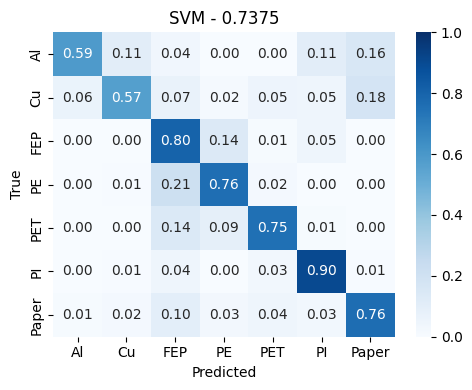

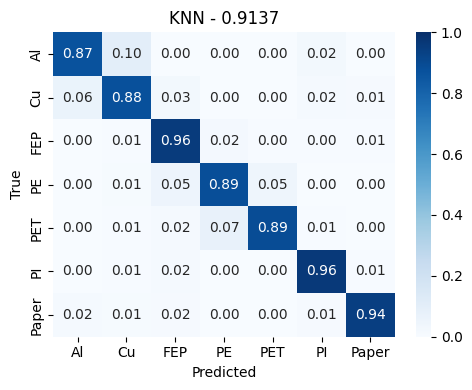

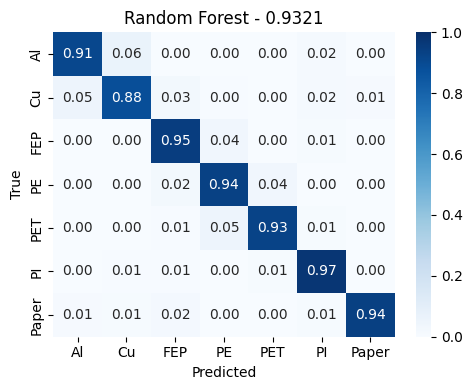

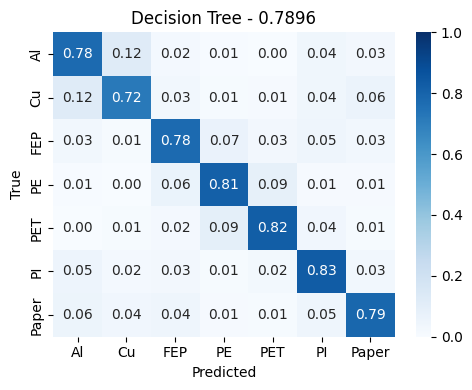

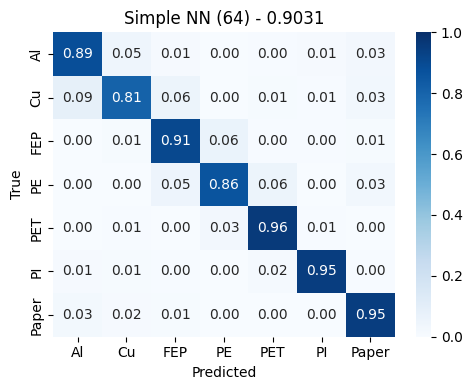

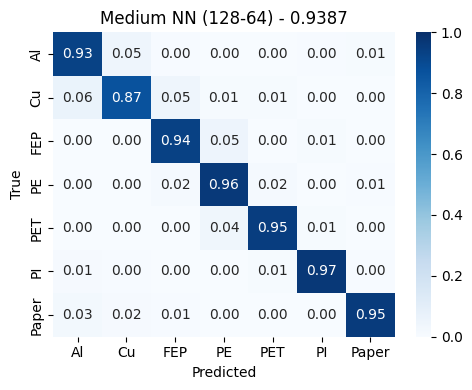

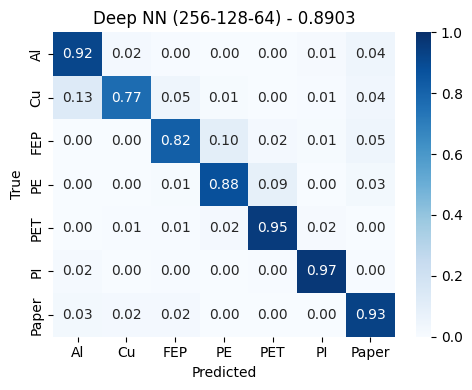

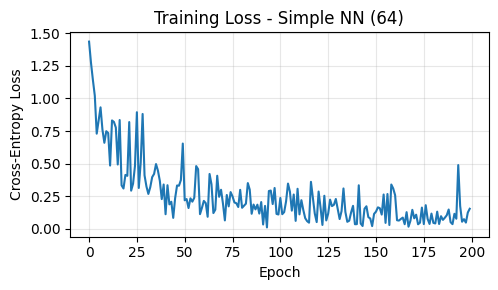

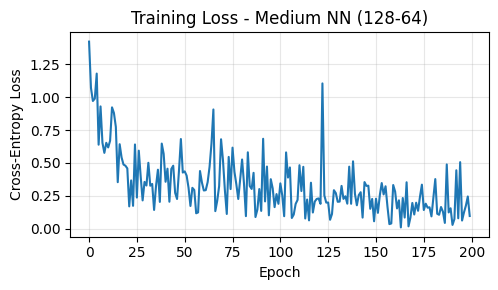

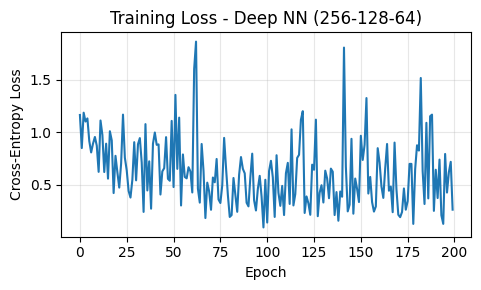

In [11]:
plot_cms(all_results, label_encoder)
plot_losses(pytorch_results)